Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Learning Objectives

- Objective 01 - understand the purpose of feature engineering
- Objective 02 - demonstrate how to work with strings in pandas
- Objective 03 - modify or create dataframe columns using the `apply()` function
- Objective 04 - work with dates and times in pandas


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective 01](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity, and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [2]:
import pandas as pd

# Pandas Display Options:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
# Lets take a look at the Ames Iowa Housing Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

### Specific Columns hold specific kinds of data

In [4]:
print(df.shape)
pd.set_option('display.max_rows', 20)
df
df.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [6]:
# Look at a few rows of the `BedroomAbvGr` column.
# Looks like integers to me!

df['BedroomAbvGr']

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

What type of variable is BedroomAbvGr?  Is it categorical or quantitative?  If you answered "categorical", is it ordinal, nominal or an identifier?  If you answered "quantitative", is it continuous or discrete?

It is quantitative and discrete.

Some columns hold float values like the `LotFrontage` column.

In [7]:
# Look at a few rows of the `LotFrontage` column.
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [8]:
df['LotFrontage'].value_counts(dropna = False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [9]:
# NaN is the most common value in this column. What is a NaN

#Number of NaN for each column
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes sense to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember - Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [10]:
import numpy as np

# What is the datatype of NaN?
type(np.NaN)

float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [11]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# get a single column

df['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [12]:
# Get more than one column, then pass in a list of column headers

df[['TotalBsmtSF', '1stFlrSF']]

,TotalBsmtSF,1stFlrSF
0,856,856
1,1262,1262
2,920,920
3,756,961
4,1145,1145
...,...,...
1455,953,953
1456,1542,2073
1457,1152,1188
1458,1078,1078


In [13]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small_df = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

small_df.head()


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [14]:
small_df.dtypes

TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
SalePrice      int64
dtype: object

### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [15]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']

small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [ ]:
# Lets make another new column that is 'PricePerSqFt' by
# dividing the price by the square footage

small_df['PricePerSqFt'] = small_df['SalePrice'] / small_df['TotalSquareFootage']

small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


###We can also use if-then statements to create new variables.  

Say we want to categorize houses as having a high price per square foot (greater than or equal to 80 dollars per square foot) or a low price per square foot (less than 80 dollars per square foot).

In [ ]:
#df.loc[df['column name'] condition, 'new column name' ] = 'value if condition if met'
small_df.loc[small_df['PricePerSqFt'] >= 80, 'High_ppsqft'] = 1
small_df.loc[small_df['PricePerSqFt'] < 80, 'High_ppsqft'] = 0

small_df[['PricePerSqFt', 'High_ppsqft']]
small_df['PricePerSqFt'] >= 80

pd.crosstab(small_df['High_ppsqft'],columns='count')

col_0,count
High_ppsqft,
0.0,1128
1.0,332


Now we have added several new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



### Let's include "and" and "or" conditions in the if-then statements.

Let's identify the 2-story duplex houses.

In [ ]:
  df.loc[(df['HouseStyle'] == '2Story') & (df['BldgType'] == "Duplex") ,'Two_story_duplex'] = 1

  df.loc[(df['HouseStyle'] != '2Story') & (df['BldgType'] != "Duplex") ,'Two_story_duplex'] = 0

  pd.crosstab(df['HouseStyle'], df['BldgType'])



BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
HouseStyle,,,,,
1.5Fin,142,8,4,0,0
1.5Unf,13,1,0,0,0
1Story,607,7,29,5,78
2.5Fin,7,1,0,0,0
2.5Unf,9,2,0,0,0
2Story,362,11,9,33,30
SFoyer,20,0,9,4,4
SLvl,60,1,1,1,2


In [ ]:
pd.crosstab(df['Two_story_duplex'], df['HouseStyle'])


HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
Two_story_duplex,,,,,,,,
0.0,150,14,697,8,11,0,28,64
1.0,0,0,0,0,0,9,0,0


In [ ]:
pd.crosstab(df['Two_story_duplex'], df['BldgType'])


BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
Two_story_duplex,,,,,
0.0,858,20,0,10,84
1.0,0,0,9,0,0


## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective 02](#work-with-strings) - Work with Strings with Pandas

# [Objective 03](#pandas-apply) - Modify and Create Columns using `.apply()`



## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [ ]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-10-30 02:25:37--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.10.168.94, 34.209.169.217, 52.10.247.232
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.10.168.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [<=>                 ]  22.30M  3.26MB/s    in 6.9s    

2020-10-30 02:25:45 (3.22 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23387713]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [ ]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [ ]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [ ]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","2287.33","2287.33","4364.28","4364.28","3312.67","1051.61","0.0","0.0","0.0","Sep-2020","190.21","Oct-2020","Sep-2020","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [ ]:
# Read in the CSV

df = pd.read_csv('LoanStats_2018Q4.csv')

print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128381, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title     emp_length home_ownership annual_inc verification_status issue_d  loan_status       pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       5000      5000        5000             36 months  11.31%  164.43      B     B3        Shipping      2 years    RENT           40000      Source Verified     Dec-2018 Current           n          NaN NaN  debt_consolidation Debt consolidation      284xx    NC         9.66  0           Oct-2007         0              NaN                    NaN                    8        0       1070      17.5%      27        w                   2770.45   2770.45       2956.61     2956.61         2229.55         727.06        0.0                0.0        0.0                     Sep-2020     164.43          Oct-2020     Sep-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              550          144979      1           2           0           1           13                 143909       78      1           3           170        44       6100             1      0           1            4                    18122       3283           8.8     0                        0           134                86                   6                     6              0        6                    NaN                      9                     NaN                            0                     2              5               3           3         19        6             8             5                   8        0                0            0                  1                  100            0                0 

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [ ]:
# We can fix the header problem by using the 'skiprows' parameter
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)

df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,284xx,NC,9.66,0.0,Oct-2007,0.0,NaN,NaN,8.0,0.0,1070.0,17.5%,27.0,w,2770.45,2770.45,2956.610000,2956.61,2229.55,727.06,0.0,0.0,0.0,Sep-2020,164.43,Oct-2020,Sep-2020,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,550.0,144979.0,1.0,2.0,0.0,1.0,13.0,143909.0,78.0,1.0,3.0,170.0,44.0,6100.0,1.0,0.0,1.0,4.0,18122.0,3283.0,8.8,0.0,0.0,134.0,86.0,6.0,6.0,0.0,6.0,NaN,9.0,NaN,0.0,2.0,5.0,3.0,3.0,19.0,6.0,8.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,125853.0,144979.0,3600.0,119753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.8,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,18.94%,366.26,D,D2,Especialist 1,7 years,MORTGAGE,37115.0,Not Verified,Dec-2018,Current,n,NaN,NaN,other,Other,891xx,NV,33.57,0.0,Jan-2002,0.0,38.0,NaN,9.0,0.0,5837.0,53.1%,15.0,w,5147.99,5147.99,7309.420000,7309.42,4852.01,2457.41,0.0,0.0,0.0,Sep-2020,366.26,Oct-2020,Sep-2020,0.0,38.0,1.0,Joint App,91115.0,18.61,Not Verified,0.0,0.0,240589.0,3.0,2.0,1.0,2.0,8.0,34508.0,88.0,2.0,3.0,1659.0,64.0,11000.0,2.0,0.0,5.0,6.0,26732.0,2669.0,52.3,0.0,0.0,158.0,203.0,4.0,4.0,1.0,5.0,38.0,7.0,38.0,1.0,2.0,5.0,3.0,6.0,4.0,6.0,10.0,5.0,9.0,0.0,0.0,0.0,4.0,93.3,33.3,0.0,0.0,253346.0,40345.0,5600.0,41060.0,19051.0,Jan-2016,1.0,1.0,9.0,76.4,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Ful

Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [ ]:
# Sum null values by column and sort from least to greatest
df.isnull().sum().sort_values()

inq_fi                           2
mo_sin_old_rev_tl_op             2
delinq_amnt                      2
chargeoff_within_12_mths         2
acc_open_past_24mths             2
                             ...  
settlement_percentage       127443
id                          128378
desc                        128380
url                         128380
member_id                   128380
Length: 144, dtype: int64

In [ ]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128375,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1.0,Jun-2006,0.0,21.0,NaN,9.0,0.0,2597.0,27.3%,15.0,f,2042.26,2042.26,3902.32,3902.32,2957.74,944.58,0.0,0.0,0.0,Sep-2020,169.83,Oct-2020,Sep-2020,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1413.0,69785.0,0.0,2.0,0.0,1.0,16.0,2379.0,40.0,3.0,4.0,1826.0,32.0,9500.0,0.0,0.0,1.0,5.0,8723.0,1174.0,60.9,0.0,0.0,147.0,85.0,9.0,9.0,2.0,10.0,21.0,9.0,21.0,0.0,1.0,3.0,2.0,2.0,6.0,6.0,7.0,3.0,9.0,0.0,0.0,0.0,3.0,92.9,50.0,0.0,0.0,93908.0,4976.0,3000.0,6028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128376,NaN,NaN,10000.0,10000.0,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0.0,Oct-2008,2.0,40.0,NaN,15.0,0.0,6269.0,13.1%,25.0,f,3996.89,3896.97,7521.28,7333.25,6003.11,1518.17,0.0,0.0,0.0,Sep-2020,327.68,Oct-2020,Sep-2020,0.0,53.0,1.0,Individual,NaN,NaN,NaN,0.0,520.0,16440.0,3.0,1.0,1.0,1.0,2.0,10171.0,100.0,2.0,5.0,404.0,28.0,47700.0,0.0,3.0,5.0,6.0,1265.0,20037.0,2.3,0.0,0.0,61.0,119.0,1.0,1.0,0.0,1.0,NaN,1.0,40.0,1.0,2.0,4.0,6.0,8.0,3.0,14.0,22.0,4.0,15.0,0.0,0.0,0.0,3.0,92.0,0.0,0.0,0.0,57871.0,16440.0,20500.0,10171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128377,NaN,NaN,10000.0,10000.0,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72

In [ ]:
# Address the extra NaNs in each column by skipping the footer as well.
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')



For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

In [ ]:
df = df.drop(['id', 'member_id', 'desc', 'url'], axis=1)

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,Oct-2007,0,NaN,NaN,8,0,1070,17.5%,27,w,2770.45,2770.45,2956.610000,2956.61,2229.55,727.06,0.0,0.0,0.0,Sep-2020,164.43,Oct-2020,Sep-2020,0,NaN,1,Individual,NaN,NaN,NaN,0,550,144979,1,2,0,1,13.0,143909,78.0,1,3,170,44.0,6100,1,0,1,4,18122.0,3283.0,8.8,0,0,134.0,86,6,6,0,6.0,NaN,9.0,NaN,0,2,5,3,3,19,6,8,5,8,0.0,0,0,1,100.0,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.8,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,10000,10000.0,36 months,18.94%,366.26,D,D2,Especialist 1,7 years,MORTGAGE,37115.0,Not Verified,Dec-2018,Current,n,other,Other,891xx,NV,33.57,0,Jan-2002,0,38.0,NaN,9,0,5837,53.1%,15,w,5147.99,5147.99,7309.420000,7309.42,4852.01,2457.41,0.0,0.0,0.0,Sep-2020,366.26,Oct-2020,Sep-2020,0,38.0,1,Joint App,91115.0,18.61,Not Verified,0,0,240589,3,2,1,2,8.0,34508,88.0,2,3,1659,64.0,11000,2,0,5,6,26732.0,2669.0,52.3,0,0,158.0,203,4,4,1,5.0,38.0,7.0,38.0,1,2,5,3,6,4,6,10,5,9,0.0,0,0,4,93.3,33.3,0,0,253346,40345,5600,41060,19051.0,Jan-2016,1.0,1.0,9.0,76.4,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,20000,20000,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.792430,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0,NaN,1,Joint App,190000.0,11.75,Not Verified,0,0,515779,1,2,0,1,13.0,46153

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column:

In [ ]:
# Look at the first 10 values of the int_rate column
df['int_rate'].head(10)

0     11.31%
1     18.94%
2      7.56%
3     11.80%
4     12.98%
5     10.33%
6     19.92%
7     23.40%
8     15.02%
9     12.98%
Name: int_rate, dtype: object

In [ ]:
# Look at a specific value from the int_rate column by specifying index
df['int_rate'][0]


' 11.31%'

In [ ]:
df['int_rate'][1]


' 18.94%'

Problems that we need to address with this column:

- String column that should be numeric
- Percent sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = df['int_rate'][0]

int_rate

my_number = 6


In [ ]:
#Remove extra white space
int_rate.strip()


'11.31%'

In [ ]:
#Doesn't work if it is not a string

my_number.strip()

AttributeError: ignored

In [ ]:
#Doesn't work to try to apply the .strip function to an entire column all at once.
#The function has to be applied to a text string.

df['int_rate'].strip('%')



AttributeError: ignored

In [ ]:
#You can "chain" two strip functions to remove both the spaces and the % sign
int_rate.strip().strip('%')



'11.31'

In [ ]:
# "Cast" the string value to a float
# "cast" -> Change something's data type
# This is the line of code that we're after! ->
float( int_rate.strip().strip('%'))


11.31

In [ ]:
type(float( int_rate.strip().strip('%')))

float

### Write a function to make our solution reusable!

In [ ]:
df['int_rate'].head()

0     11.31%
1     18.94%
2      7.56%
3     11.80%
4     12.98%
Name: int_rate, dtype: object

We want to write a function that will look in every cell of int_rate, take out the white space and the % and convert the result into a float.

Every function has several standard parts:

* def statement
* name
* parameter name(s)
* body
* a return statement
* a return value

Here's an example of a function that the raduius of a sphere and calculates the volume.

It would be a pain to have to write this code over and over again if we needed to do this calculation a lot, so it's nice to have it written as a re-usable function. 

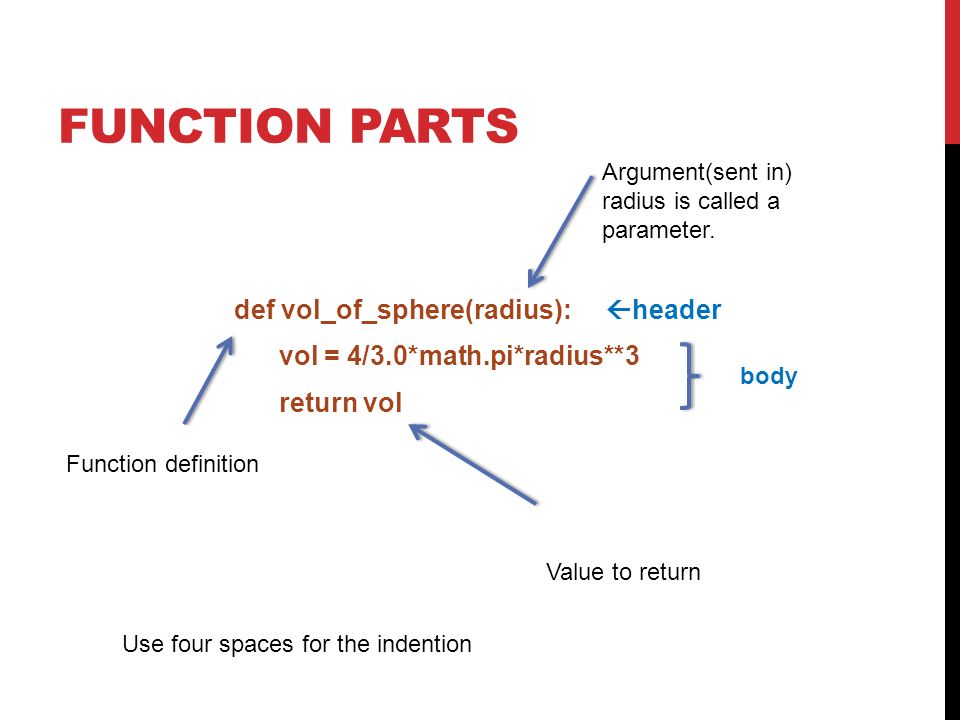

In [ ]:
# Here is a function that will take a single string, strip off the space and %
# And return the value as a float

def int_rate_to_float(string):
  return float(string.strip().strip('%'))

* def = def
* return = return
* int_rate_to_float is the name of the name of the function
* string is the parameter name
* the body of the function is the same as the row beginning with return
* float(string.strip().strip('%')) is the value to return



In [ ]:
# Test out our function by calling it on our example
int_rate_to_float(int_rate)


11.31

In [ ]:
# is the data type correct?
type(int_rate_to_float(int_rate))


float

The the problem is that - to use this function - we'd have to feed in every interest rate one by one.  Not pracitcal.  

Fortunately we can use the .apply() function built to into Python, which will apply the function to every row of a variable.

### Apply our solution to every cell in a column

In [ ]:
df['int_rate'].apply(int_rate_to_float)

0         11.31
1         18.94
2          7.56
3         11.80
4         12.98
          ...  
128373    15.02
128374    15.02
128375    13.56
128376    11.06
128377    16.91
Name: int_rate, Length: 128378, dtype: float64

In [ ]:
# pass in *only* the name of the function, don't call it. 
# This works because we know the function works on every item in the column
# so I can simply "apply" it to the entire column

df['int_rate_cleaned'] = df['int_rate'].apply(int_rate_to_float)

df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,Oct-2007,0,NaN,NaN,8,0,1070,17.5%,27,w,2770.45,2770.45,2956.610000,2956.61,2229.55,727.06,0.0,0.0,0.0,Sep-2020,164.43,Oct-2020,Sep-2020,0,NaN,1,Individual,NaN,NaN,NaN,0,550,144979,1,2,0,1,13.0,143909,78.0,1,3,170,44.0,6100,1,0,1,4,18122.0,3283.0,8.8,0,0,134.0,86,6,6,0,6.0,NaN,9.0,NaN,0,2,5,3,3,19,6,8,5,8,0.0,0,0,1,100.0,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.8,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31
1,10000,10000,10000.0,36 months,18.94%,366.26,D,D2,Especialist 1,7 years,MORTGAGE,37115.0,Not Verified,Dec-2018,Current,n,other,Other,891xx,NV,33.57,0,Jan-2002,0,38.0,NaN,9,0,5837,53.1%,15,w,5147.99,5147.99,7309.420000,7309.42,4852.01,2457.41,0.0,0.0,0.0,Sep-2020,366.26,Oct-2020,Sep-2020,0,38.0,1,Joint App,91115.0,18.61,Not Verified,0,0,240589,3,2,1,2,8.0,34508,88.0,2,3,1659,64.0,11000,2,0,5,6,26732.0,2669.0,52.3,0,0,158.0,203,4,4,1,5.0,38.0,7.0,38.0,1,2,5,3,6,4,6,10,5,9,0.0,0,0,4,93.3,33.3,0,0,253346,40345,5600,41060,19051.0,Jan-2016,1.0,1.0,9.0,76.4,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94
2,20000,20000,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.792430,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0,NaN,1,Joint App,190000.0,11.75,Not Verified,

In [ ]:
# What type of data is held in our new column?
print(df['int_rate_cleaned'].dtypes)

# Look at the datatypes of the last 5 columns
df.dtypes.tail()



float64


settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
int_rate_cleaned         float64
dtype: object

## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

###What is a list comprehension?


List comprehension is an elegant way to define and create lists based on existing lists.



A list comprehension has the form: [expression for item in list]

In [ ]:
#List comprehension tht returns a list of columns from df where the column
#name ends with _d

[col for col in df.columns if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

* Expression = col (first time, before for)
* Item = col (second time, after for)
* List = df if col.endswith('_d')

Lets look at the string format of the `issue_d` column

In [ ]:
df['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
            ...   
128373    Oct-2018
128374    Oct-2018
128375    Oct-2018
128376    Oct-2018
128377    Oct-2018
Name: issue_d, Length: 128378, dtype: object

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [ ]:
df['issue_d'][0]

'Dec-2018'

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [ ]:
pd.to_datetime(df['issue_d'][0])

Timestamp('2018-12-01 00:00:00')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format= True)

df['issue_d']

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
            ...    
128373   2018-10-01
128374   2018-10-01
128375   2018-10-01
128376   2018-10-01
128377   2018-10-01
Name: issue_d, Length: 128378, dtype: datetime64[ns]

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [ ]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128373    2018
128374    2018
128375    2018
128376    2018
128377    2018
Name: issue_d, Length: 128378, dtype: int64

Now the month.

In [ ]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128373    10
128374    10
128375    10
128376    10
128377    10
Name: issue_d, Length: 128378, dtype: int64

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [ ]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,issue_year,issue_month
0,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,Oct-2007,0,NaN,NaN,8,0,1070,17.5%,27,w,2770.45,2770.45,2956.610000,2956.61,2229.55,727.06,0.0,0.0,0.0,Sep-2020,164.43,Oct-2020,Sep-2020,0,NaN,1,Individual,NaN,NaN,NaN,0,550,144979,1,2,0,1,13.0,143909,78.0,1,3,170,44.0,6100,1,0,1,4,18122.0,3283.0,8.8,0,0,134.0,86,6,6,0,6.0,NaN,9.0,NaN,0,2,5,3,3,19,6,8,5,8,0.0,0,0,1,100.0,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.8,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,2018,12
1,10000,10000,10000.0,36 months,18.94%,366.26,D,D2,Especialist 1,7 years,MORTGAGE,37115.0,Not Verified,2018-12-01,Current,n,other,Other,891xx,NV,33.57,0,Jan-2002,0,38.0,NaN,9,0,5837,53.1%,15,w,5147.99,5147.99,7309.420000,7309.42,4852.01,2457.41,0.0,0.0,0.0,Sep-2020,366.26,Oct-2020,Sep-2020,0,38.0,1,Joint App,91115.0,18.61,Not Verified,0,0,240589,3,2,1,2,8.0,34508,88.0,2,3,1659,64.0,11000,2,0,5,6,26732.0,2669.0,52.3,0,0,158.0,203,4,4,1,5.0,38.0,7.0,38.0,1,2,5,3,6,4,6,10,5,9,0.0,0,0,4,93.3,33.3,0,0,253346,40345,5600,41060,19051.0,Jan-2016,1.0,1.0,9.0,76.4,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,2018,12
2,20000,20000,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.792430,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0

Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format= True)

In [ ]:
df['issue_d'] - df['earliest_cr_line']

0         4079 days
1         6178 days
2         7243 days
3         2679 days
4         9192 days
            ...    
128373   12114 days
128374   13241 days
128375    4505 days
128376    3652 days
128377    4413 days
Length: 128378, dtype: timedelta64[ns]

In [ ]:
#Create credit length in days
df['credit_length_days'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

#Create credit length in years
#Don't forget leap year = 365.25 each year.
df['credit_length_years'] =  df['credit_length_days'] /365.25

df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,issue_year,issue_month,credit_length_days,credit_length_years
0,5000,5000,5000.0,36 months,11.31%,164.43,B,B3,Shipping,2 years,RENT,40000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,284xx,NC,9.66,0,2007-10-01,0,NaN,NaN,8,0,1070,17.5%,27,w,2770.45,2770.45,2956.610000,2956.61,2229.55,727.06,0.0,0.0,0.0,Sep-2020,164.43,Oct-2020,Sep-2020,0,NaN,1,Individual,NaN,NaN,NaN,0,550,144979,1,2,0,1,13.0,143909,78.0,1,3,170,44.0,6100,1,0,1,4,18122.0,3283.0,8.8,0,0,134.0,86,6,6,0,6.0,NaN,9.0,NaN,0,2,5,3,3,19,6,8,5,8,0.0,0,0,1,100.0,0.0,0,0,125853,144979,3600,119753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,May-2020,2.0,0.0,ACTIVE,58.8,3121.41,164.43,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,2018,12,4079,11.167693
1,10000,10000,10000.0,36 months,18.94%,366.26,D,D2,Especialist 1,7 years,MORTGAGE,37115.0,Not Verified,2018-12-01,Current,n,other,Other,891xx,NV,33.57,0,2002-01-01,0,38.0,NaN,9,0,5837,53.1%,15,w,5147.99,5147.99,7309.420000,7309.42,4852.01,2457.41,0.0,0.0,0.0,Sep-2020,366.26,Oct-2020,Sep-2020,0,38.0,1,Joint App,91115.0,18.61,Not Verified,0,0,240589,3,2,1,2,8.0,34508,88.0,2,3,1659,64.0,11000,2,0,5,6,26732.0,2669.0,52.3,0,0,158.0,203,4,4,1,5.0,38.0,7.0,38.0,1,2,5,3,6,4,6,10,5,9,0.0,0,0,4,93.3,33.3,0,0,253346,40345,5600,41060,19051.0,Jan-2016,1.0,1.0,9.0,76.4,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,2018,12,6178,16.914442
2,20000,20000,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,1999-02-01,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.7

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

What's oldest credit history that was involved in Q4 2018? 

In [ ]:
df['credit_length_years'].max()
df['credit_length_days'].max()/365.25

68.91444216290212

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.